In [3]:
import matplotlib.pyplot as plt
import numpy as np
from ripser import ripser, Rips
from persim import plot_diagrams
from sklearn.datasets import make_circles, make_blobs, make_moons, load_wine, load_breast_cancer, load_iris
import random

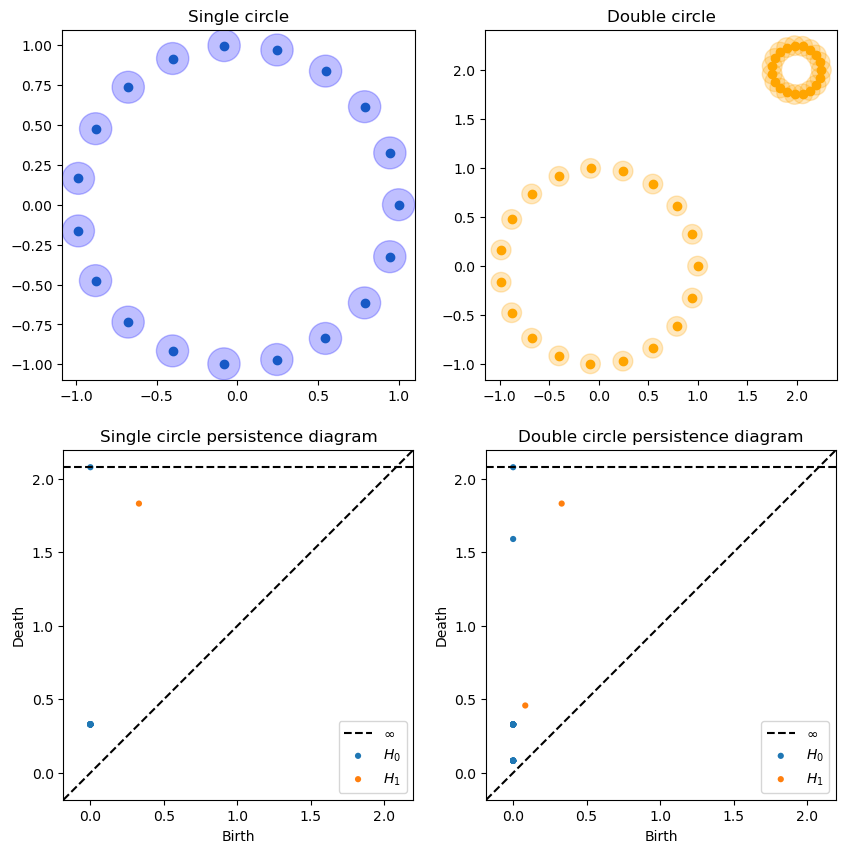

In [78]:
t = np.linspace(0, 2*np.pi-0.001, 20)
x, y = np.cos(t[:-1]), np.sin(t[:-1])
data = np.array([x, y]).T
xx = np.append(x, x/4+2)
yy = np.append(y, y/4+2)
data2 = np.array([xx, yy]).T

fig, ax = plt.subplots(2, 2, figsize=(10,10))
ax[0, 0].scatter(x, y)
ax[0, 1].scatter(xx, yy, color = 'orange')
ax[0,0].set_title("Single circle")
ax[0,1].set_title("Double circle")
for i in range(len(x)):
    ball_2d = plt.Circle((x[i], y[i]), 0.1, color='b', fill=True, alpha=.25)
    ax[0, 0].add_artist(ball_2d)
for i in range(len(xx)):
    ball_2d = plt.Circle((xx[i], yy[i]), 0.1, color='orange', fill=True, alpha=.25)
    ax[0, 1].add_artist(ball_2d)

dgms1 = ripser(data)['dgms']
dgms2 = ripser(data2)['dgms']

plt.subplot(223)
plot_diagrams(dgms1)
plt.title("Single circle persistence diagram")
plt.subplot(224)
plot_diagrams(dgms2)
plt.title("Double circle persistence diagram")

plt.show()

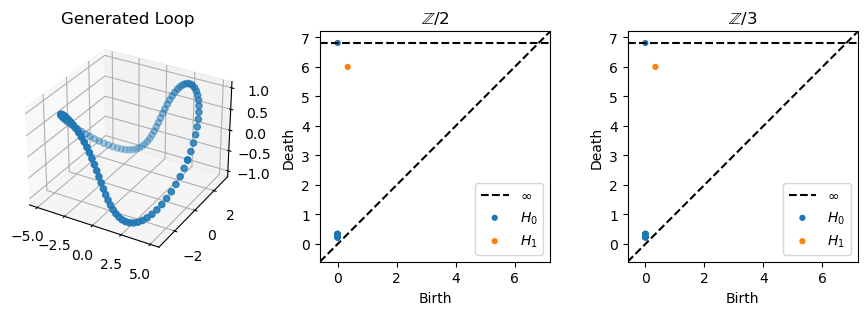

In [36]:
## Step 1: Setup curve
N = 100 # Number of points to sample
R = 4   # Big radius of torus
r = 1   # Little radius of torus
X = np.zeros((N, 3))
t = np.linspace(0, 2*np.pi, N)
X[:, 0] = (R + r*np.cos(2*t))*np.cos(t)
X[:, 1] = (R + r*np.cos(2*t))*np.sin(t)
X[:, 2] = r*np.sin(2*t)

## Step 2: Compute persistent homology
dgms2 = ripser(X, coeff=2)['dgms']
dgms3 = ripser(X, coeff=3)['dgms']

fig = plt.figure(figsize=(9, 3))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
ax.set_aspect('auto')
plt.title("Generated Loop")
plt.subplot(132)
plot_diagrams(dgms2)
plt.title("$\mathbb{Z} / 2$")
plt.subplot(133)
plot_diagrams(dgms3)
plt.title("$\mathbb{Z} / 3$")

plt.tight_layout()
plt.show()

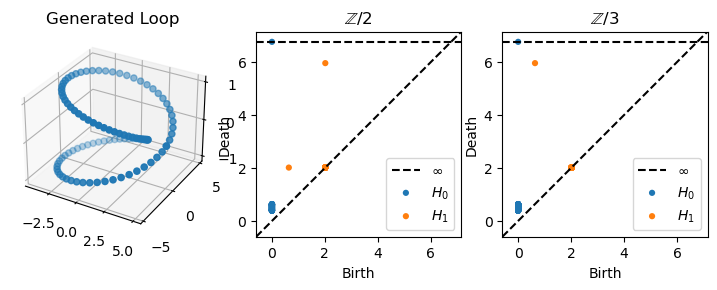

In [38]:
X[:, 0] = (R + r*np.cos(t))*np.cos(2*t)
X[:, 1] = (R + r*np.cos(t))*np.sin(2*t)
X[:, 2] = r*np.sin(t)

## Step 2: Compute persistent homology
dgms2 = ripser(X, coeff=2)['dgms']
dgms3 = ripser(X, coeff=3)['dgms']

fig = plt.figure(figsize=(9, 3))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
ax.set_aspect('auto')
plt.title("Generated Loop")
plt.subplot(132)
plot_diagrams(dgms2)
plt.title("$\mathbb{Z} / 2$")
plt.subplot(133)
plot_diagrams(dgms3)
plt.title("$\mathbb{Z} / 3$")


plt.show()